In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
train = pd.read_csv("D:/Projects/titanic/train.csv")

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

### Missing Data

In [12]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


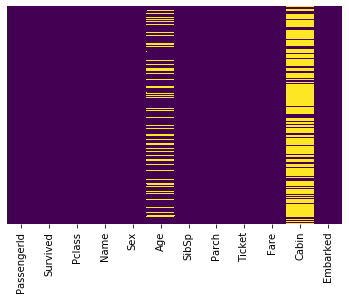

In [19]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap='viridis')


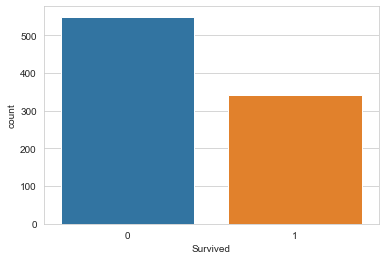

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

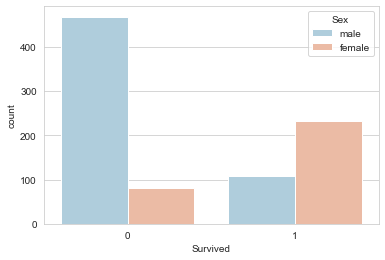

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

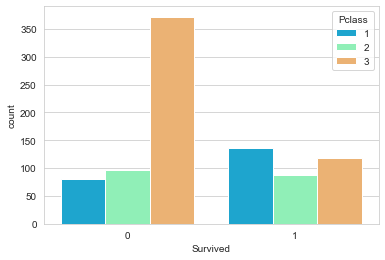

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

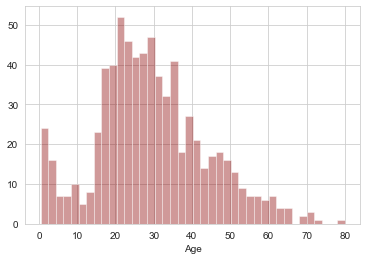

In [38]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

###### Dist plot renders a histogram, can increase/decrease number of bins for clarity

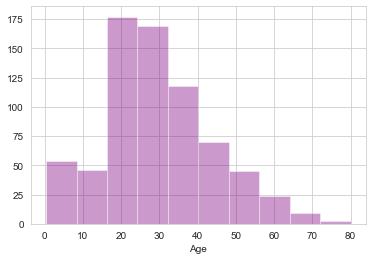

In [43]:
sns.distplot(train['Age'].dropna(),kde=False,color='purple',bins=10)

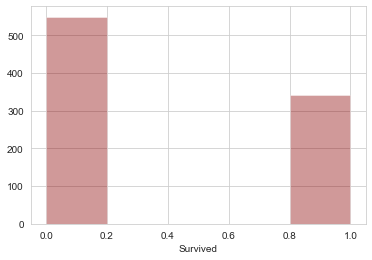

In [44]:
sns.distplot(train['Survived'].dropna(),kde=False,color='darkred',bins=5)

###### matplotlib 'hist' same as sns 'distplot'

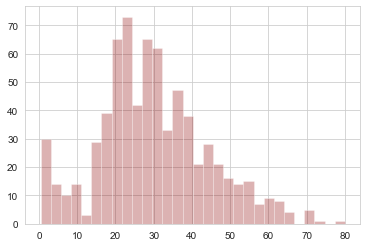

In [45]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)


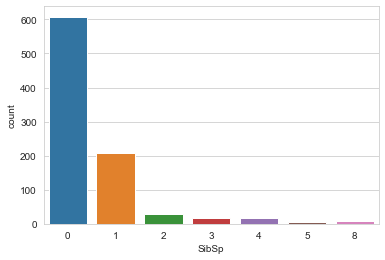

In [46]:
sns.countplot(x='SibSp',data=train)


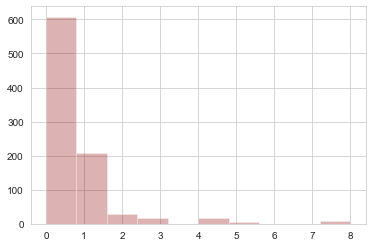

In [47]:
train['SibSp'].hist(bins=10,color='darkred',alpha=0.3)


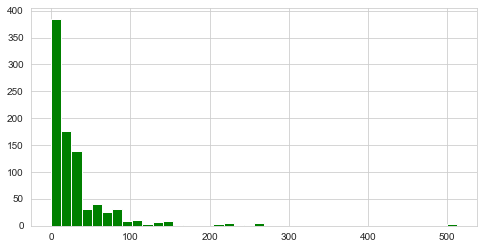

In [48]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))


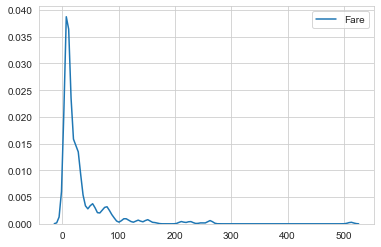

In [52]:
sns.kdeplot(train['Fare'])


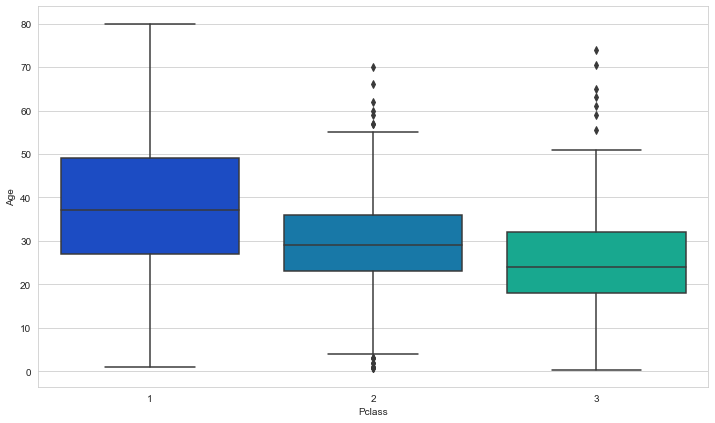

In [51]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

###### Note that countplot, hist, distplot works for single variables i.e to find the frequency of a single variable 
boxplot is for plotting against two variables

In [72]:
mean_age = train[['Pclass','Age']].groupby(['Pclass']).mean()
# mean_age1 = train.groupby(['Pclass'])['Age'].mean()


In [81]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [82]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


In [83]:
train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

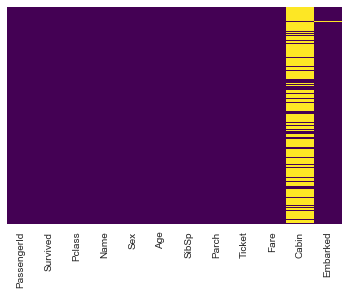

In [87]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')